In [1]:
from google.colab import files
uploaded=files.upload()

Saving impurity.xlsx to impurity.xlsx


In [ ]:
#documentation
#datset=buys_computer
#c.divya(monday)
#bl.en.u4cse21047

In [2]:
import pandas as pd
import numpy as np
df=pd.read_excel('impurity.xlsx')
df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [8]:
import pandas as pd
import numpy as np

def calculate_entropy(y):
    unique_labels = y.unique()
    entropy = 0
    total_samples = len(y)

    for label in unique_labels:
        label_count = len(y[y == label])
        p_label = label_count / total_samples
        entropy -= p_label * np.log2(p_label)

    return entropy
features = df.columns.difference(['buys_computer'])
entropy_dict = {}
for feature in features:
    entropy = 0
    unique_values = df[feature].unique()

    for value in unique_values:
        subset = df[df[feature] == value]
        entropy += len(subset) / len(df) * calculate_entropy(subset['buys_computer'])
    entropy_dict[feature] = entropy
for feature, entropy in entropy_dict.items():
    print(f"Entropy of {feature}: {entropy}")


Entropy of age: 0.6935361388961918
Entropy of credit_rating: 0.8921589282623617
Entropy of income: 0.9110633930116763
Entropy of student: 0.7884504573082896


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
X =df.iloc[:,0:3]
y =df.iloc[:,[4]]
X_train, X_test, y_train, y_test = train_test_split(X, y )
model.fit(X_train,y_train)

training_accuracy = model.score(X_train,y_train)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


ValueError: ignored

In [14]:
#for the above error fwe should do label encoding
from sklearn.preprocessing import LabelEncoder
k = LabelEncoder()
df['age'] = k.fit_transform(df['age'])
df['income'] = k.fit_transform(df['income'])
df['student'] = k.fit_transform(df['student'])
df['credit_rating'] = k.fit_transform(df['credit_rating'])
df['buys_computer'] = k.fit_transform(df['buys_computer'])
df





,age,income,student,credit_rating,buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,2,2,1,1,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
a =df.iloc[:,0:3]
b =df.iloc[:,[4]]
X_train, X_test, y_train, y_test = train_test_split(a, b )
model.fit(X_train,y_train)

training_accuracy = model.score(X_train,y_train)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Training Set Accuracy: 1.0
Tree Depth: 2


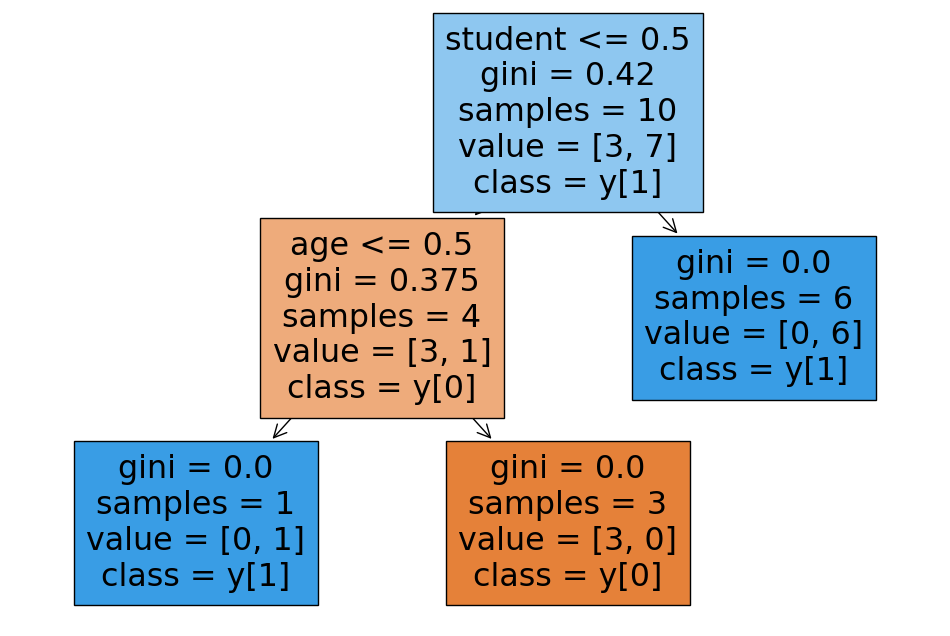

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()
